# Gradient Descent in Linear Regression

[![8ZePW8.png](https://s1.ax1x.com/2020/03/12/8ZePW8.png)](https://imgchr.com/i/8ZePW8)
 
 - $X_b$ 是在矩阵 $X$ 中加了一列，值为 1
 - 我们希望最后得出的梯度值和样本数量 m 无关，故变为如下形式

[![8Znp28.png](https://s1.ax1x.com/2020/03/12/8Znp28.png)](https://imgchr.com/i/8Znp28)


### 1. 编程实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(333)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size = 100)

In [3]:
X = x.reshape(-1, 1)

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

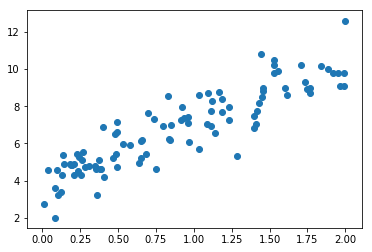

In [6]:
plt.scatter(x, y)

### 2. 使用梯度下降法训练模型

In [7]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [8]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if np.abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
            break
        
        i_iter += 1
    
    return theta

In [10]:
X_b = np.hstack([np.ones([len(X), 1]), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

In [11]:
theta

array([3.91375651, 3.2165194 ])

### 3. 封装我们的线性回归梯度下降算法

- 其中梯度下降算法中的求导过程，可以转为向量化运算

[![8ZnS8f.png](https://s1.ax1x.com/2020/03/12/8ZnS8f.png)](https://imgchr.com/i/8ZnS8f)

- `X_b.T.dot(X_b.dot(theta) - y) * 2. / len(X_b)`

In [14]:
from LR.LinearRegression import LinearRegression

In [15]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [16]:
lin_reg.coef_

array([3.2165194])

In [17]:
lin_reg.intercept_

3.9137565113396082